<a href="https://colab.research.google.com/github/HongWonSeok/hairloss/blob/main/Final_HW_%EC%A7%84%EC%A7%9C%EC%A0%95%EB%A7%90%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

자료 출처 : https://www.idai.or.kr/user/data_market/detail.do?id=389a44b0-4e17-11ea-9259-977b63f3ed80

**연령,성별 등을 대표 할 수 있는 탈모 정보 데이터이다

이 데이터는 총 615명의 남녀에 대한 데이터이다.

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/HongWonSeok/hairloss/main/hairlossdata.csv',encoding='CP949')
df.head()


,성별,age,C-DNA-IL2RA,G-DNA- CTLA4,A-DNA-Chr20P11,G-DNA-HLA-DQB1,RNA-5alphaCt(dR),RNA-GapCt(dR),RNA-ddCt,RNA-개인수치,RNA-변환 값,수식,RNA 비교-남자비교,RNA 비교-여자비교,RNA 비교-10대비교,RNA 비교-20대비교,RNA 비교-30대비교,RNA 비교-40대비교,RNA 비교-50대비교,RNA 비교-정상인비교,물리검사(인장강도)-앞,물리검사(인장강도)-중앙,물리검사(인장강도)-뒤,tensile strength test-hairloss,물리검사(인장강도)-평균,물리검사(인장강도) 비교수치-남자비교,물리검사(인장강도) 비교수치-여자비교,물리검사(인장강도) 비교수치-10대비교,물리검사(인장강도) 비교수치-20대비교,물리검사(인장강도) 비교수치-30대비교,물리검사(인장강도) 비교수치-40대비교,물리검사(인장강도) 비교수치-50대비교,물리검사(인장강도) 비교수치-정상인비교,optical inspection-front,optical inspection-center,optical inspection-occipital,optical inspection-hairloss,optical inspection-mean,광학검사(현미경) 비교수치-남자비교,광학검사(현미경) 비교수치-여자비교,광학검사(현미경) 비교수치-10대비교,광학검사(현미경) 비교수치-20대비교,광학검사(현미경) 비교수치-30대비교,광학검사(현미경) 비교수치-40대비교,광학검사(현미경) 비교수치-50대비교,광학검사(현미경) 비교수치-정상인비교,life style - external factors,life style-internal factor,life style - mental health,life style - nutritional status,life style - total,가족탈모 여부,체모,아토피 여부,갑상선 질환 여부,알러지 비염 여부,샴푸 횟수,샴푸 후 헹굼,모자 착용,두피 타입,매달 염색 파마를 한다,수면 시간,쉽게 피곤함을 느낀다,"Drink more than five drinks, three times a week",최소 하루 한 끼의 규칙적인 식사를 한다,I smoke more than half a pack a cigarette,땀이 날 정도의 운동,속쓰림이 있다,소화불량이 있다,주 3회 이상 섭취하는 음식에 체크,혼자라는 느낌이 들고 외롭다,무기력하다,감정을 솔직히 드러내는 편이다,"취미, 여가 활동을 일주일에 1회 이상 한다",한 달에 1회 이상 모임을 갖는다
0,man,10~19,CC,GA,AA,GA,37.64,36.03,0.327598,407,0.914006267,가,3.94379845,FALSE,3.909702209,FALSE,FALSE,FALSE,FALSE,3.76364,80.2,43.200,38.1,28.600000,47.525,0.458293153,FALSE,0.452964163,FALSE,FALSE,FALSE,FALSE,0.47525,37.12,24.000,20.400000,15.680000,24.3,0.725373134,FALSE,0.704347826,FALSE,FALSE,FALSE,FALSE,0.752322,55.0,75.000,80.0,45.0,63.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,man,20~29,CC,GA,GA,GA,32.22,31.24,0.506980,225.9268003,FALSE,FALSE,109.9739132,FALSE,FALSE,FALSE,145.041151,55.9,93.4,54.20000,51.4,63.725,0.7072697,0.000000,FALSE,0.661596761,FALSE,FALSE,FALSE,0.704922566,22.2,25,20.80000,19.90,21.975,0.708871,0.000000,NaN,0.68671875,FALSE,FALSE,FALSE,0.702076677,87,92.5,47.000000,22.0,62.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,man,20~29,CC,GA,GA,GA,27.49,23.02,0.045123,20.10819401,FALSE,FALSE,9.788023289,FALSE,FALSE,FALSE,12.90911746,122.1,130.9,119.30000,116.0,122.075,1.354883463,0.000000,FALSE,1.26738995,FALSE,FALSE,FALSE,1.350387168,36.4,43.52,42.64000,33.76,39.080,1.260645,0.000000,NaN,1.22125,FALSE,FALSE,FALSE,1.2485623,95,85,4.000000,40.0,56.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,woman,20~29,CC,GA,GA,GA,35.64,33.82,0.283221,FALSE,97.68058937,FALSE,61.43621938,FALSE,FALSE,FALSE,81.02630623,106.5,73.1,64.60000,48.3,73.125,FALSE,0.734925,FALSE,0.759188123,FALSE,FALSE,FALSE,0.808904867,34.88,35.04,25.84000,24.16,29.980,0.000000,0.951746,NaN,0.936875,FALSE,FALSE,FALSE,0.957827476,76.5,72.5,52.000000,44.0,61.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,man,20~29,TT,GA,GA,GG,29.45,27.65,0.287175,127.9744157,FALSE,FALSE,62.29383704,FALSE,FALSE,FALSE,82.15739131,54.2,88.1,100.20000,37.6,70.025,0.777192009,0.000000,FALSE,0.727003738,FALSE,FALSE,FALSE,0.774612832,20.8,35.6,29.92000,21.68,27.000,0.870968,0.000000,NaN,0.84375,FALSE,FALSE,FALSE,0.862619808,85,87.5,37.000000,26.0,58.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**데이터상의 남자와 여자의 비율**

이 데이터는 약71.7%의 남성과 28.3%의 여성의 데이터로 이루어져 있다. 

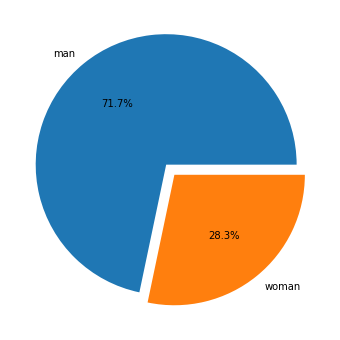

In [89]:

genderCount = df['성별'].value_counts(normalize =True)
fig,ax = plt.subplots(figsize=(6,6))

ax.pie(genderCount,
       labels=genderCount.index,
       explode=[0.05,0.05],
       autopct="%1.1f%%"
       )
plt.show()


**광학 검사(현미경)에 대한 탈모 진행 상태이다.**

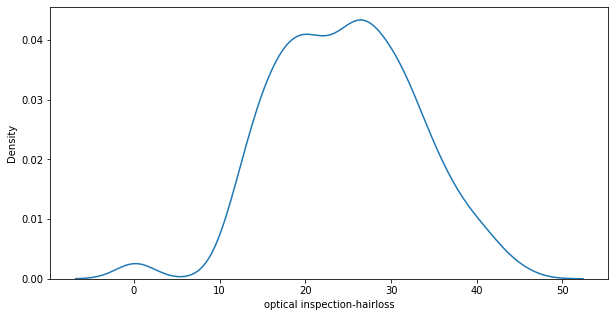

In [90]:
hair=df['optical inspection-hairloss'].dropna(axis=0)
d=hair.index
fig ,ax = plt.subplots(figsize=(10,5))

sns.kdeplot(data=d,x=hair)

**광학검사(현미경)와 물리 검사(인장강도)의 상관관계**

이 자료에서는 탈모에 대한 검사를 두 개 하여 수치로 나타내주었다. 현미경검사와 인장강도에 대한검사를 실시하였는데, 이 두개의 데이터로 상관 관계를 나타내본다.

수치가 1에 가까울 수록 관계가 깊고 0에 가까울 수록 관계가 적다. 아래 결과를 보면 현미경 검사결과 탈모율이 진행되는 상태와 두피에대한 인장 강도에 대한 correlation값이 0.83으로매우 높게 나왔다. 이 말은 인장강도와 탈모 진행 상태와의 관계가 밀접하다는 것을 알 수있다.

참조(https://youngwonhan-family.tistory.com/62)

In [91]:
data=df[['tensile strength test-hairloss','optical inspection-hairloss']].dropna(axis=0)

corr_data = data.corr()
corr_data = corr_data.apply(lambda x: round(x,2))
corr_data

,tensile strength test-hairloss,optical inspection-hairloss
tensile strength test-hairloss,1.00,0.84
optical inspection-hairloss,0.84,1.00


**인장 강도에 대한 KDE PLOT이다.**

높은 상관계수에 걸맞게 광학검사(현미경)의 PLOT과 유사한 형태를 띄고 있다.

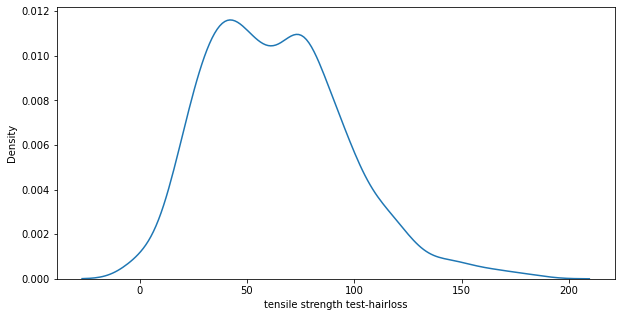

In [93]:
hair=df['tensile strength test-hairloss'].dropna(axis=0)
d=hair.index
fig ,ax = plt.subplots(figsize=(10,5))

sns.kdeplot(data=d,x=hair)

인장강도에 따른 탈모진행률에대한 LeanearRegression결과 r2 score가0.6427이 나왔다.

In [94]:
X_SET = ['tensile strength test-hairloss']
X=df[X_SET].astype('int')
y=df['optical inspection-hairloss'].astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))


r2 socre is 0.6427
root_mean_squared error of is 5.15


**나이대별 탈모** 

전체 615명들을 나이대 별로 count

In [95]:
age = df.age.value_counts()
age

20~29    315
30~39    181
40~49     54
10~19     35
50+       30
Name: age, dtype: int64

참고 자료(https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%83%88%EB%AA%A8+%EB%82%98%EC%9D%B4&oquery=%ED%83%88%EB%AA%A8&tqi=hNvOOdp0J14ssSpdZUwssssstOZ-521626)

이 자료를 보게되면 단순히 네이버에 '탈모 나이'라고 쳤는데도 젊은 층들에게도 많이 나타 날 수 있다는 점을 보여준다. 또한 젊은 층들이 외적인 부분에 많이 관심을 가지고 있기 때문에 더 적극적인 설문 참여가 있지 않았을까 예상한다. 물론 10대는 성장기기 때문에 탈모의 발생률이 적어 10대의 데이터수가 적다고 본다.

또한 아래의 boxplot을 보게되면 20대,30대의 이상치가 다른 나이대에 비해 많은데 아래의 boxplot을 보면 이상치가 낮게 잡혀있다는 것은 탈모 경증 환자들또한 이 데이터셋에 포함되어있다라고 볼 수있다. 이점을 보게되면 20대,30대가 탈모에대해 관심이 많다고 볼 수 있다. 

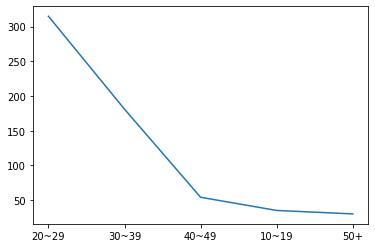

In [96]:
plt.plot(age.index,age)
plt.show()

나이대별로 광학 검사(현미경) 전면, 중앙 , 후두부에 대한 값을 추출하였다.

In [97]:
front='optical inspection-front'
center='optical inspection-center'
occipital='optical inspection-occipital'

#나이대별로 추출
age_10s=df[df['age']=='10~19']
age_20s=df[df['age']=='20~29']
age_30s=df[df['age']=='30~39']
age_40s=df[df['age']=='40~49']
age_50plus=df[(df['age']=='50+')]


참조 (https://3months.tistory.com/292)
나이대별로 만든 것을 데이터 프레임화 시킴

나이 대 별로 각 부위에 대해 평균을 내본 결과 10대부터 50대이상 까지 모든 계층에서  비슷한 결과를 보였다. 처음 결과를 예측했을때는 20대가 탈모활성도가 적었다가 나이가 들수록 높아질 것으로 예측했는데 이 결과를 보니 내가 가져온 데이터는 탈모가 일정수준 발생한 사람들에 대한 데이터라는 점을 알게 되었다.

In [98]:

#10대에 대한 전면,중앙,후두부 평균
age_10s_front_mean=age_10s[front].mean()
age_10s_center_mean=age_10s[center].mean()
age_10s_occipital_mean=age_10s[occipital].mean()

#20대에 대한 전면,중앙,후두부 평균
age_20s_front_mean=age_20s[front].mean()
age_20s_center_mean=age_20s[center].mean()
age_20s_occipital_mean=age_20s[occipital].mean()

#30대에 대한 전면,중앙,후두부 평균
age_30s_front_mean=age_30s[front].mean()
age_30s_center_mean=age_30s[center].mean()
age_30s_occipital_mean=age_30s[occipital].mean()

#40대에 대한 전면,중앙,후두부 평균
age_40s_front_mean=age_40s[front].mean()
age_40s_center_mean=age_40s[center].mean()
age_40s_occipital_mean=age_40s[occipital].mean()

#50대이상에 대한 전면,중앙,후두부 평균
age_50plus_front_mean=age_50plus[front].mean()
age_50plus_center_mean=age_50plus[center].mean()
age_50plus_occipital_mean=age_50plus[occipital].mean()

age_hairloss = pd.DataFrame(data=np.array([['10~19',age_10s_front_mean, age_10s_center_mean, age_10s_occipital_mean],
                                          ['20~29',age_20s_front_mean, age_20s_center_mean, age_20s_occipital_mean],
                                          ['30~39',age_30s_front_mean, age_30s_center_mean, age_30s_occipital_mean],
                                          ['40~49',age_40s_front_mean, age_40s_center_mean, age_40s_occipital_mean],
                                          ['50+',age_50plus_front_mean, age_50plus_center_mean, age_50plus_occipital_mean]]),            
                            columns=['age',front,center,occipital])

age_hairloss

,age,optical inspection-front,optical inspection-center,optical inspection-occipital
0,10~19,30.36685714285714,29.148000000000007,29.09942857142857
1,20~29,30.42958730158731,29.5343015873016,29.76120788530475
2,30~39,29.487176795580098,28.92795580110499,30.17142541436464
3,40~49,29.35611111111111,29.028703703703716,30.04425925925926
4,50+,27.303666666666672,27.376666666666672,29.874000000000002


자세히 보기위해 이것에 대한 box plot을 그려보았다.

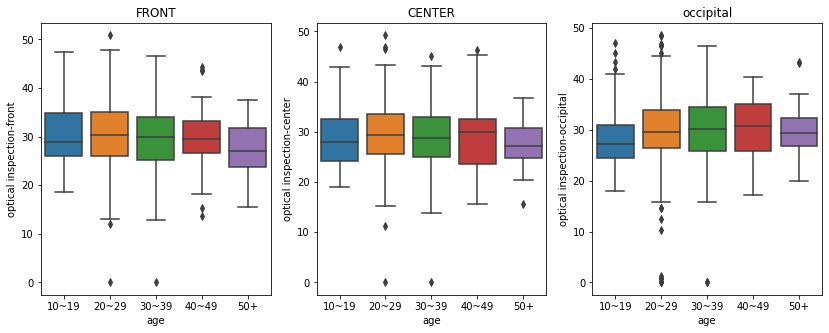

In [99]:
fig,ax = plt.subplots(1,3,figsize=(14,5))

sns.boxplot(x='age',
            y=front,
            data=df,
            ax=ax[0])
sns.boxplot(x='age',
            y=center,
            data=df,
            ax=ax[1])
sns.boxplot(x='age',
            y=occipital,
            data=df,
            ax=ax[2])
ax[0].set_title('FRONT')
ax[1].set_title('CENTER')
ax[2].set_title('occipital')
plt.show()

**라이프 스타일**

외부적 요인, 내부적 요인, 영양상태에 대한 통계이며, 오른쪽 하단 histplot은 각각의 사람에 대한 외부적 요인, 내부적 요인, 영양상태의 평균값을 나타낸다. 

아래의 자료를 볼때, 각기 다른 라이프 스타일을 가지고 있다. 평범하게 일상을 보내는 사람들은 보통 50-80수치를 가진 사람들이 많이 나타난다. 이 점을 보아 라이프 스타일에 탈모가 미치는 영향이 없다고 볼 수는 없지만 그렇게 크게 영향을 끼치지는 않는 것 처럼 보인다..

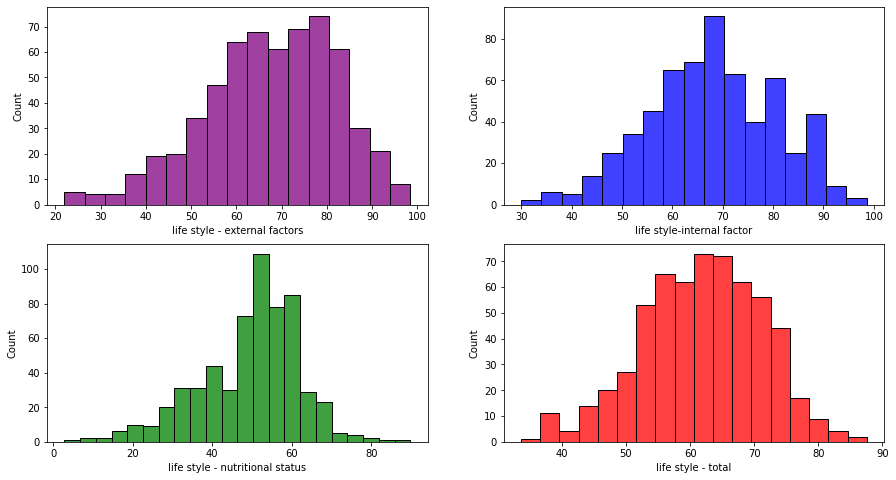

In [100]:
import seaborn as sns
# subplot들을 만든다.
fig,ax = plt.subplots(2,2,figsize=(15,8))
attribute1='life style - external factors'
attribute2='life style-internal factor'
attribute3='life style - nutritional status'
totattribute='life style - total'

# 각각의 subplot에 histplot으로 데이터를 채워준다.
sns.histplot(data=df,x=attribute1,color = "purple",ax=ax[0,0])
sns.histplot(data=df,x=attribute2,color = "blue", ax=ax[0,1])
sns.histplot(data=df,x=attribute3,color = "green", ax=ax[1,0])
sns.histplot(data=df,x=totattribute,color = "red", ax=ax[1,1])



**외부적 요인, 내부적 요인, 영양 상태에 대한 평균**

더 자세히 보기 위해 외부적 요인, 내부적 요인, 영양상태에 대한 각각의 평균을 추려보았다.

각각의 평균을 보게되면 각각 외부적요인은 67.51863560732104, 내부적 요인은 67.80836106489187, 영양상태는 49.57114093959732의 추치를 가지고 있다. 이 데이터를 가지고 각각의 수치에 대한 평균을 보았을 때 외부적 요인, 내부적 요인에 대해 탈모는 크게 영향을 주는 것 같지 않은 것 처럼 보인다. 그러나 영양상태는 49.57114093959732로 빈약한 수치를 나타내는 것으로 보인다. 이점으로 보아, 영양상태는 탈모에 영향을 어느정도 끼치는 것으로 보인다.

In [101]:
# 외부적 요인에 대한 평균
externmean=df[attribute1].mean()
externmean

67.51863560732104

In [102]:
#내부적요인에 대한 평균
internmean=df[attribute2].mean()
internmean

67.80836106489187

In [103]:
#영양 상태에 대한평균
nutritionalmean=df[attribute3].mean()
nutritionalmean

49.57114093959732

이것을 한눈에 보기위해 barplot으로 그려보았다.

참조 (https://rfriend.tistory.com/411) 

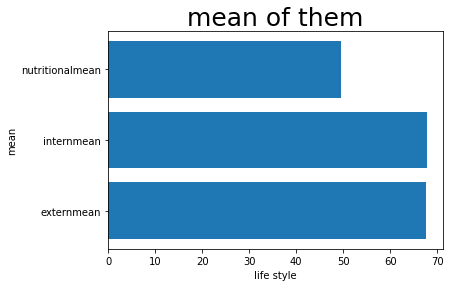

In [104]:
y=[externmean,internmean,nutritionalmean]
x=['externmean','internmean','nutritionalmean']


plt.barh(x,y)
plt.title('mean of them',fontsize=25)
plt.xlabel('life style')
plt.ylabel('mean')

plt.show()

라이프 스타일에 관하여 **하루에 담배 반갑이상 피는 사람**과 **술을 일주일에 3-5번 마시는 사람의 비율**을 조사해 보았다.

담배 데이터와 술 데이터 두개 다 총615명중 379명이 설문에 참여해 주었다.

In [105]:
#술에 대한 예외처리
drink_data = df['Drink more than five drinks, three times a week'].dropna(axis=0)

drink_data

233    YES
234     NO
236    YES
237     NO
239     NO
      ... 
610     NO
611     NO
612     NO
613     NO
614    YES
Name: Drink more than five drinks, three times a week, Length: 379, dtype: object

In [106]:
#담배에 대한 예외처리
smoke_data = df['I smoke more than half a pack a cigarette'].dropna(axis=0)

smoke_data

233     NO
234    YES
236    YES
237     NO
239     NO
      ... 
610     NO
611     NO
612    YES
613     NO
614     NO
Name: I smoke more than half a pack a cigarette, Length: 379, dtype: object

plot참조(https://soooprmx.com/matplotlib%EC%9D%98-%EA%B8%B0%EB%B3%B8-%EC%82%AC%EC%9A%A9%EB%B2%95-%EB%B0%8F-%EB%8B%A4%EB%A5%B8-%EC%8B%9C%EA%B0%81%ED%99%94-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/)


두개의 PIE PLOT을 보면 우선 일주일에 3번에서5번 술을 마시는 사람은 19.3%이고, 가끔 그렇게 먹는사람은 0.5%, 3~5번 미만으로 먹는 사람은 80.2%이다. 그리고 하루에 담배 반갑이상 피는 사람은 18.7%이고, 그렇지 않은 사람은 81.3%이다. 이 결과를 보게되면 술과 담배가 탈모에 직접적인 영향을 끼치지못하는 것을 예측 할 수 있다.

Text(0.5, 1.0, 'About smoke')

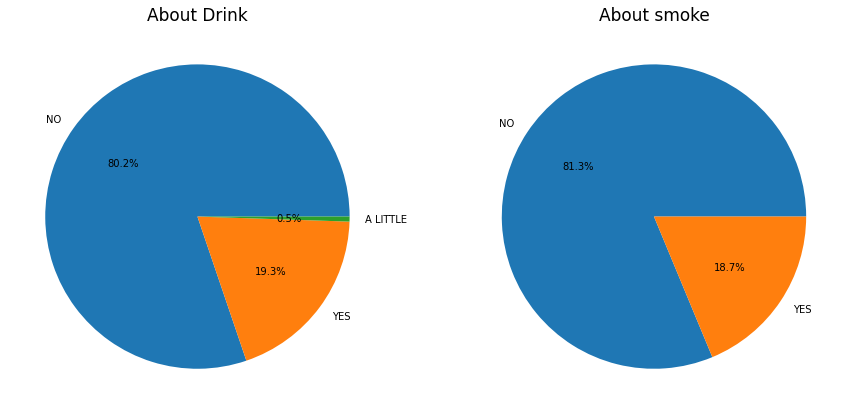

In [107]:
drink = df['Drink more than five drinks, three times a week'].dropna(axis=0).value_counts(normalize =True)
smoke = df['I smoke more than half a pack a cigarette'].dropna(axis=0).value_counts(normalize =True)

#PIE PLOT을 SUB PLOT들을 이용하여 그려보았다.
fig,ax = plt.subplots(1,2,figsize=(15,8)) 

ax[0].pie(x=drink,labels=drink.index,autopct="%1.1f%%")
ax[0].set_title('About Drink',fontsize=17)
ax[1].pie(x=smoke,labels=smoke.index,autopct="%1.1f%%")
ax[1].set_title('About smoke',fontsize=17)


**탈모 가족력에 대한 분석**

탈모 가족력 데이터

In [108]:
#탈모 가족력에 대한 데이터이다.
df['가족탈모 여부']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
610    mother side
611             no
612           both
613             no
614    father side
Name: 가족탈모 여부, Length: 615, dtype: object

**탈모 가족력에 대해 예외 처리한 부분**



예외 처리 결과 총 615명의 대상중 379명 만이 이 항목에 대해 설문참여를 해주었다.

이 자료에서 알아야 하는 것은 father side는 아버지쪽 사촌까지 다 포함 하고있고, mother side는 어머니쪽 사촌까지 다 포함 하고있다. 그러나 몇대까지(위로 할아버지 할머니 그 이상을 포함하는지)의 자료인지는 정확히 모르기 때문에 이자료를 완전히 신뢰 할 수는 없다.

In [109]:
# 탈모 가족력에 대한 NAN값을 예외처리 한다. 
familyhairloss = df['가족탈모 여부'].dropna(axis=0)
familyhairloss

233             no
234    mother side
236    father side
237             no
239    father side
          ...     
610    mother side
611             no
612           both
613             no
614    father side
Name: 가족탈모 여부, Length: 379, dtype: object

참조 (https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)

자세히 보기위해 plot을 그려주었다.

plot을 보게되면 탈모 보유자중 가족력이 없는 경우도 있지만 탈모 가족력이 있는 데이터들을 합치면 탈모 가족력이 없는 데이터의 2배정도 되는 것으로 보인다. 이 데이터로 보았을 때, 가족에 탈모가 있을 경우 본인도 탈모가 있을 확률이 있는 것으로 보인다. 

다시한번 말하지만 이 자료는 위로 몇대까지 탈모가 있는지 수집한 자료가 아니므로 설득력은 떨어지지만 당장 아버지쪽, 어머니쪽 사촌까지의 자료만 보아도 가족에 탈모가 있으면 본인도 탈모발생을 할 수 있는 확률이 있다고 볼 수 있다.

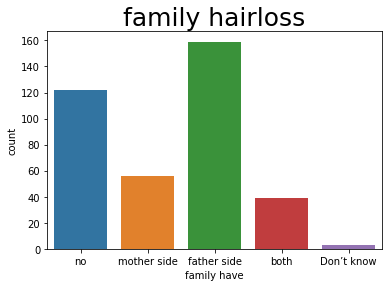

In [110]:
x=familyhairloss.index

#countplot을 활용하여 값별로
sns.countplot(x=x,data=familyhairloss)
plt.title('family hairloss',fontsize=25)
plt.xlabel('family have')
plt.ylabel('count')

plt.show()

이것을 Naive Bayes를 이용하여 머신러닝을 해보았다.

데이터 프레임을 추출해준다.

In [111]:
df_1=df[['가족탈모 여부','optical inspection-hairloss']]
df_1.head()

,가족탈모 여부,optical inspection-hairloss
0,NaN,15.680000
1,NaN,0.000000
2,NaN,0.000000
3,NaN,0.951746
4,NaN,0.000000


결측값을 예외처리 해준다.

In [112]:
df_2=df_1.dropna(axis='rows')
df_2

,가족탈모 여부,optical inspection-hairloss
233,no,23.36
234,mother side,30.24
236,father side,34.24
237,no,28.64
239,father side,22.24
...,...,...
610,mother side,10.18
611,no,25.96
612,both,14.96
613,no,16.88


get_dummies를 이용하여 numerical value값으로 바꾸어준다.

In [113]:
familydata=pd.get_dummies(df_2)
familydata

,optical inspection-hairloss,가족탈모 여부_Don’t know,가족탈모 여부_both,가족탈모 여부_father side,가족탈모 여부_mother side,가족탈모 여부_no
233,23.36,0,0,0,0,1
234,30.24,0,0,0,1,0
236,34.24,0,0,1,0,0
237,28.64,0,0,0,0,1
239,22.24,0,0,1,0,0
...,...,...,...,...,...,...
610,10.18,0,0,0,1,0
611,25.96,0,0,0,0,1
612,14.96,0,1,0,0,0
613,16.88,0,0,0,0,1


이후 머신러닝을 진행해준다.

In [123]:
y=familydata['optical inspection-hairloss'].astype('int')
X = familydata.drop(columns='optical inspection-hairloss')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.1,random_state=0)

from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(X_train,y_train)

predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test,predictions))


Accuracy:  0.02631578947368421


머신러닝 결과 test_size=0.2일때 정확도가 0.01로 낮게 나왔는데, 위에서 나이대별 탈모진행 상태에서 나온 결론에 의해 내가 가지고 있는 데이터셋의 대부분의 사람이 이미 어느정도 탈모가 진행된 상태인 점을 생각해 보면 가족력이 있는 사람과 없는 사람의 탈모 진행상태 차이가 크지 않기 때문에 이렇게 낮은 정확도가 나온 것같다. 이 점을 고려하여 test_size를 0,1로 놓고 돌려본 결과 정확고다 0.02로 미묘하게 올라간 것을 볼 수 있다.